## Exploratory Data Analysis

###import

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt ## import
from ggplot import *
%matplotlib inline

###basic data reading from last time

In [2]:
#df.head(5)
df = pd.read_csv("/Users/Robin/Documents/dssg/project-inspector-gadget/DATA/Building_Violations_sample_50000.csv")

def spaces_to_snake(column_name): # cleaning
    '''
    converts a string that has spaces into snake_case
    '''
    
    s = re.sub(r'\s+','_', column_name)
    return s.lower()

df.columns = [spaces_to_snake(col) for col in df.columns]
df.dtypes

/Users/Robin/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


unnamed:_0                        int64
id                                int64
violation_last_modified_date     object
violation_date                   object
violation_code                   object
violation_status                 object
violation_status_date            object
violation_description            object
violation_location               object
violation_inspector_comments     object
violation_ordinance              object
inspector_id                     object
inspection_number                 int64
inspection_status                object
inspection_waived                object
inspection_category              object
department_bureau                object
address                          object
property_group                    int64
ssa                              object
latitude                        float64
longitude                       float64
location                         object
dtype: object

In [3]:
df.violation_date = pd.to_datetime(df.violation_date)
df.violation_status_date = pd.to_datetime(df.violation_status_date)
df.violation_last_modified_date = pd.to_datetime(df.violation_last_modified_date)

###EDA

In [9]:
df.describe()

,id,inspection_number,property_group,latitude,longitude
count,50000.000000,50000.000000,50000.000000,49952.000000,49952.000000
mean,3300031.329640,6195288.986320,197729.741420,41.845539,-87.673442
std,1088123.083684,4296079.998463,183132.260836,0.087437,0.057008
min,742158.000000,375113.000000,1001.000000,41.644712,-87.914436
25%,2400057.500000,2021217.500000,20600.750000,41.771440,-87.714271
50%,3421152.000000,2813561.000000,142605.000000,41.854001,-87.670709
75%,4223617.750000,10630848.750000,363929.250000,41.912843,-87.634551
max,5064815.000000,11597625.000000,663759.000000,42.022645,-87.525898


In [13]:
pd.value_counts(df.inspection_status)

FAILED    38371
PASSED     6426
CLOSED     5199
HOLD          4
dtype: int64

In [14]:
pd.value_counts(df.violation_inspector_comments.isnull())

False    44705
True      5295
dtype: int64

In [16]:
df.violation_inspector_comments = df.violation_inspector_comments.fillna('No Comment')

In [17]:
pd.value_counts(df.violation_inspector_comments.isnull())

False    50000
dtype: int64

### select/subset 

In [18]:
df[df.violation_inspector_comments=='No Comment'].head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location
13,5063459,2015-05-20,2015-05-20,CN193019,OPEN,NaT,REPAIR/WRECK DANGER RESID PREM,NaN,No Comment,Repair or wreck dangerous and vacant residenti...,...,CLOSED,N,COMPLAINT,DEMOLITION,3051 S BROAD ST,285348,NaN,41.838454,-87.660979,"(41.83845438362799,-87.6609787384341)"
15,5063885,2015-05-21,2015-05-20,BR1001,OPEN,NaT,OWNER OR LICENSED CONTRACTOR,NaN,No Comment,The code violations listed below must be corre...,...,CLOSED,N,PERIODIC,BOILER,6448 S TRIPP AVE,387870,NaN,41.775328,-87.728922,"(41.775328312329904,-87.72892174006991)"
16,5063912,2015-05-21,2015-05-20,PL151137,OPEN,NaT,OPEN,NaN,No Comment,NaN,...,FAILED,N,PERMIT,PLUMBING,3835 W CERMAK RD,280823,NaN,41.851485,-87.721159,"(41.85148492680666,-87.72115941535648)"
18,5063320,2015-05-20,2015-05-20,CN193019,OPEN,NaT,REPAIR/WRECK DANGER RESID PREM,NaN,No Comment,Repair or wreck dangerous and vacant residenti...,...,CLOSED,N,COMPLAINT,DEMOLITION,11025 S ESMOND ST,516079,NaN,41.693018,-87.667286,"(41.69301757344688,-87.66728567428113)"
20,5064410,2015-05-20,2015-05-20,CN193039,OPEN,NaT,POST OWNER NAME OF VACNT BLDG,NaN,No Comment,"Post conspicuously name, address, and telephon...",...,CLOSED,N,COMPLAINT,DEMOLITION,6928 S KIMBARK AVE,393870,NaN,41.769012,-87.594164,"(41.76901189738516,-87.59416364991507)"


### groupby

In [19]:
df.groupby("department_bureau").mean()

,id,inspection_number,property_group,latitude,longitude
department_bureau,,,,,
BOILER,3187754,6534207,250911,41.841682,-87.670488
CONSERVATION,3182004,5599306,182792,41.846195,-87.673469
CONSTRUCTION EQUIPMENT,3843828,9226801,296070,41.928653,-87.684458
DEMOLITION,4230535,10161867,303974,41.807409,-87.669775
ELECTRICAL,3148057,6082962,226475,41.839267,-87.670183
ELEVATOR,4030558,8923590,99430,41.900869,-87.659214
IRON,3440557,8065067,87547,41.906648,-87.671767
NEW CONSTRUCTION,2984252,5171424,229395,41.863878,-87.683687
PLUMBING,3162547,5747402,249322,41.817108,-87.663690


In [68]:
group = df[['id','violation_date', 'violation_code']].groupby(['violation_date', 'violation_code']).count()

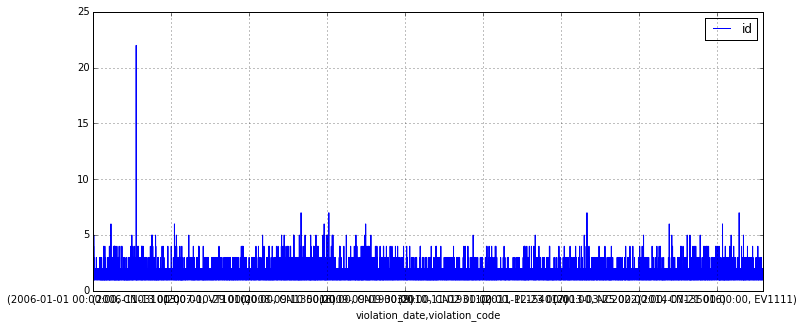

In [73]:
group.plot(figsize = (12, 5))
#pd.DataFrame.plot?

In [24]:
df.dtypes

id                                       int64
violation_last_modified_date    datetime64[ns]
violation_date                  datetime64[ns]
violation_code                          object
violation_status                        object
violation_status_date           datetime64[ns]
violation_description                   object
violation_location                      object
violation_inspector_comments            object
violation_ordinance                     object
inspector_id                            object
inspection_number                        int64
inspection_status                       object
inspection_waived                       object
inspection_category                     object
department_bureau                       object
address                                 object
property_group                           int64
ssa                                     object
latitude                               float64
longitude                              float64
location     

In [59]:
df.violation_status.unique()
len(df.inspector_id.unique())
df[['location', 'latitude', 'longitude']].head(3)
#df.latitude.head(20)

,location,latitude,longitude
0,"(41.73308939713441,-87.60618433527188)",41.733089,-87.606184
1,"(41.77708792596553,-87.61569442972947)",41.777088,-87.615694
2,"(41.93799454179893,-87.70865671096144)",41.937995,-87.708657


In [28]:
df.violation_ordinance.head(5)
df.inspection_category.unique()

array(['COMPLAINT', 'PERIODIC', 'PERMIT', 'REGISTRATION'], dtype=object)

### types of plots to be drawn:
* Counts
    * 
* Temporal trends
    * line plot: number of violations ~ time
    * line plot: number of violating buildings ~ time
* Spatial trends
    * scatterplot: latitude ~ longitude, color = inspection_status (passed, failed, closed, hold)


####Counting unique occurences within groupby: nunique()

In [4]:

grouped = df[['violation_date', 'inspection_category','id']].groupby(['violation_date', 'inspection_category']).count()

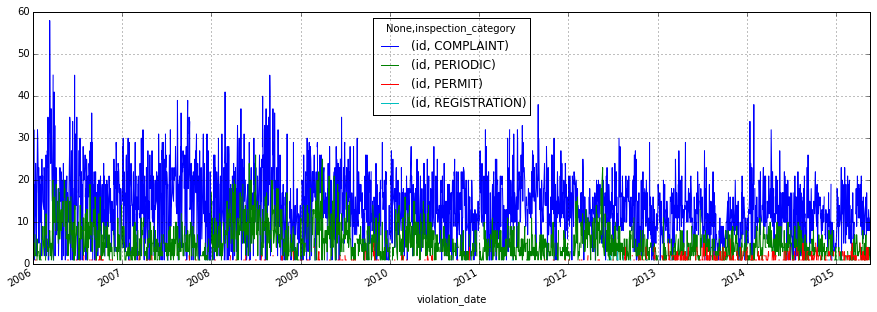

In [5]:
grouped.unstack(level = -1).plot(figsize = [15, 5])

In [42]:
df['property_group'].unique().size
grouped_bd = df[['violation_date','inspection_category','property_group']].groupby(['violation_date','inspection_category'])['property_group'].nunique()
grouped_bd # unique buildings

violation_date  inspection_category
2006-01-01      PERIODIC                9
2006-01-02      COMPLAINT               1
                PERIODIC               46
2006-01-03      COMPLAINT              12
                PERIODIC                1
2006-01-04      COMPLAINT              24
                PERIODIC                4
2006-01-05      COMPLAINT              17
                PERIODIC                2
2006-01-06      COMPLAINT              16
                PERIODIC                1
2006-01-07      COMPLAINT               1
2006-01-09      COMPLAINT              10
                PERIODIC                4
2006-01-10      COMPLAINT              12
                PERIODIC                3
2006-01-11      COMPLAINT              19
                PERIODIC                2
                PERMIT                  1
2006-01-12      COMPLAINT              19
                PERIODIC                2
                PERMIT                  1
2006-01-13      COMPLAINT              1

In [ ]:
grouped_bd.unstack(level = -1).plot(figsize = [15, 5], title = 'daily violating building count ~ time')

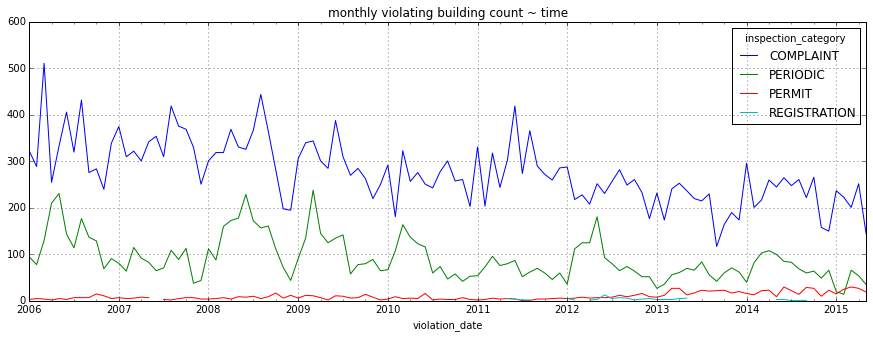

In [41]:
grouped_bd_m = grouped_bd.unstack(level = -1).resample('M', how='sum')
grouped_bd_m.plot(figsize = [15, 5], title = 'monthly violating building count ~ time')